In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!cp -r '/content/gdrive/My Drive/dataset' data/

In [3]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense, Dropout

Using TensorFlow backend.


In [4]:
# Initialising the CNN
classifier = Sequential()

In [5]:
classifier.add(Conv2D(32, (3,3), input_shape = (64,64,3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Conv2D(32, (3,3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))

In [0]:
classifier.add(Flatten())

In [0]:
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dense(units=1, activation='sigmoid'))

In [8]:
classifier.compile(optimizer='adam', loss= 'binary_crossentropy', metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale= 1./255,
                                   channel_shift_range = 100,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip=True,
)

In [0]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
training_set = train_datagen.flow_from_directory('/content/data/hotdogs/train',
                                                target_size = (64,64),
                                                batch_size =32,
                                                class_mode = 'binary')

Found 1502 images belonging to 2 classes.


In [13]:
test_set = test_datagen.flow_from_directory('/content/data/hotdogs/test',
                                            target_size = (64,64),
                                            batch_size= 32,
                                            class_mode='binary')

Found 535 images belonging to 2 classes.


In [14]:
loss_history = []
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                

In [15]:
for i in range(10):
  loss_history += [classifier.fit_generator(training_set,
                         steps_per_epoch = 1502,
                         epochs = 1,
                         validation_data = test_set,
                         validation_steps = 535)]




Epoch 1/1





1502/1502 [==============================] - 355s 236ms/step - loss: 0.5427 - acc: 0.7082 - val_loss: 0.6633 - val_acc: 0.7159
Epoch 1/1
1502/1502 [==============================] - 342s 228ms/step - loss: 0.1911 - acc: 0.9229 - val_loss: 1.0255 - val_acc: 0.7306
Epoch 1/1
1502/1502 [==============================] - 343s 228ms/step - loss: 0.0667 - acc: 0.9760 - val_loss: 1.3163 - val_acc: 0.7177
Epoch 1/1
1502/1502 [==============================] - 328s 218ms/step - loss: 0.0412 - acc: 0.9859 - val_loss: 1.6104 - val_acc: 0.6992
Epoch 1/1
1502/1502 [==============================] - 327s 218ms/step - loss: 0.0356 - acc: 0.9874 - val_loss: 1.5979 - val_acc: 0.7008
Epoch 1/1
1502/1502 [==============================] - 323s 215ms/step - loss: 0.0244 - acc: 0.9915 - val_loss: 1.9443 - val_acc: 0.6714
Epoch 1/1
1502/1502 [==============================] - 325s 216ms/step - loss: 0.0229 - acc: 0.9922 - val_loss: 1.4798 - val_acc: 0.7255
Epoch 1/1
1502/1502 [============

KeyboardInterrupt: ignored

10


Text(0.5, 1.0, 'Accuracy')

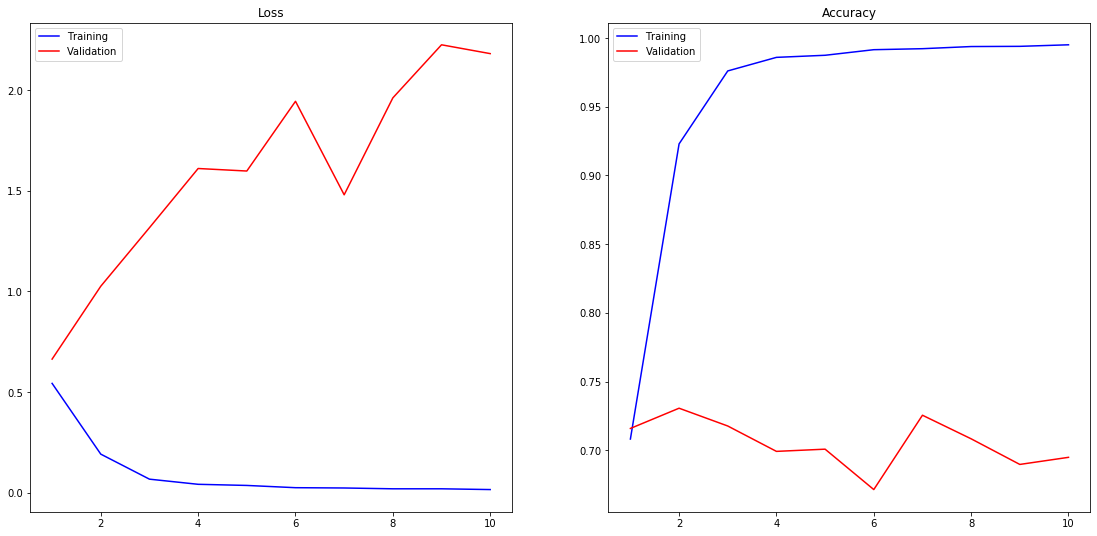

In [35]:
print(len(loss_history))
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

epich = np.cumsum(np.concatenate(
    [np.linspace(1, 1, len(mh.epoch)) for mh in loss_history]))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(19, 9))
_ = ax1.plot(epich,
             np.concatenate([mh.history['loss'] for mh in loss_history]),
             'b-',
             epich, np.concatenate(
        [mh.history['val_loss'] for mh in loss_history]), 'r-')
ax1.legend(['Training', 'Validation'])
ax1.set_title('Loss')

_ = ax2.plot(epich, np.concatenate(
    [mh.history['acc'] for mh in loss_history]), 'b-',
                 epich, np.concatenate(
        [mh.history['val_acc'] for mh in loss_history]),
                 'r-')
ax2.legend(['Training', 'Validation'])
ax2.set_title('Accuracy')